In [1]:
# TensorFlow dan tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


## Praproses Data
Untuk tugas Klasifikasi Gambar dengan TensorFlow ini, data harus diproses terlebih dahulu sebelum melatih jaringan saraf.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

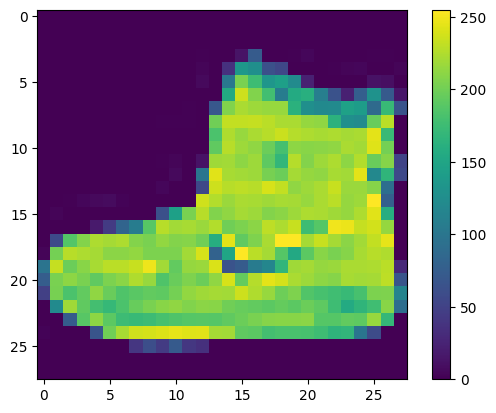

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

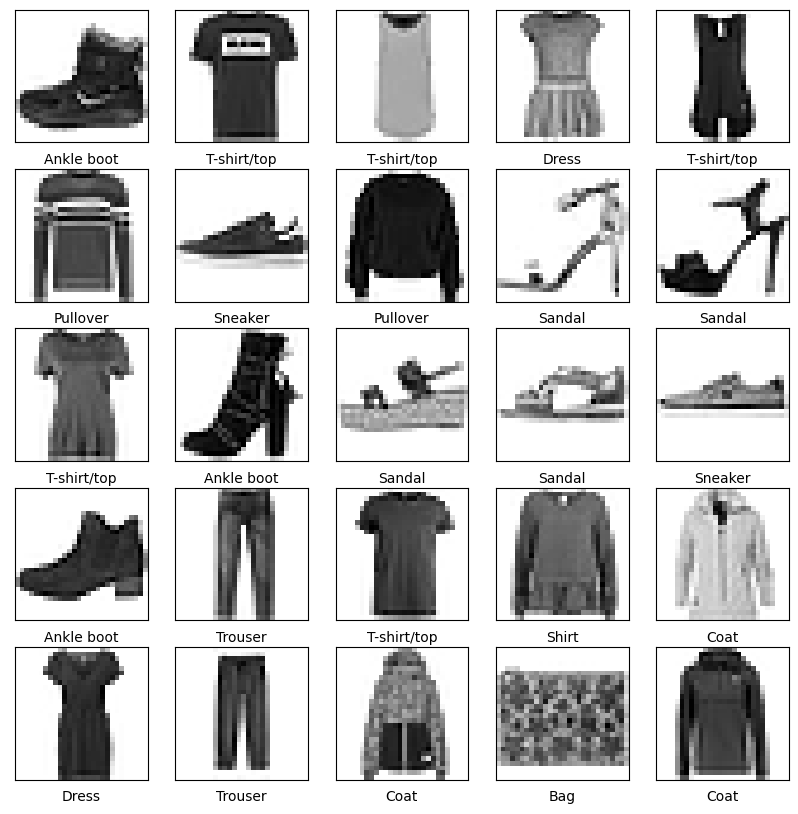

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model Sequential

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
#Menyesuaikan model
history = model.fit(train_images, train_labels, epochs=10,
    verbose=2,#untuk mengatur animasi
    validation_data=(test_images, test_labels))
#evaluasi accuracy
test_acc = model.evaluate(test_images,  test_labels)
print("\n test loss and accuracy :",test_acc)


Epoch 1/10
1875/1875 - 3s - loss: 0.0688 - accuracy: 0.9739 - val_loss: 0.7000 - val_accuracy: 0.8824 - 3s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.0657 - accuracy: 0.9751 - val_loss: 0.7387 - val_accuracy: 0.8825 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.0669 - accuracy: 0.9751 - val_loss: 0.6765 - val_accuracy: 0.8863 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 3s - loss: 0.0645 - accuracy: 0.9759 - val_loss: 0.6660 - val_accuracy: 0.8837 - 3s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 3s - loss: 0.0648 - accuracy: 0.9757 - val_loss: 0.7244 - val_accuracy: 0.8798 - 3s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.0635 - accuracy: 0.9767 - val_loss: 0.7258 - val_accuracy: 0.8835 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 3s - loss: 0.0638 - accuracy: 0.9761 - val_loss: 0.7252 - val_accuracy: 0.8844 - 3s/epoch - 1ms/step
Epoch 8/10
1875/1875 - 3s - loss: 0.0606 - accuracy: 0.9771 - val_loss: 0.7247 - val_accuracy: 0.8858 - 3s/epoch - 2ms/step
Epoch 9/

In [25]:
#Membuat prediksi
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 1ms/step


array([2.5710307e-15, 2.4393075e-14, 1.2032718e-16, 1.8808433e-13,
       1.7439711e-16, 6.4626908e-09, 1.9204909e-17, 4.0445349e-05,
       2.8803640e-14, 9.9995959e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

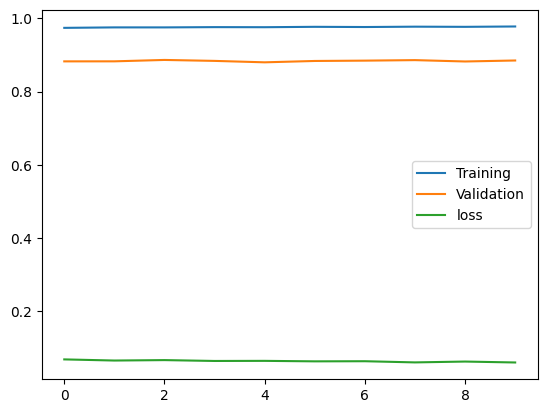

In [34]:
plt.plot(range(len(history.history['accuracy'])),
history.history['accuracy'],
label = 'Training')

plt.plot(range(len(history.history['val_accuracy'])),
history.history['val_accuracy'],
label = 'Validation')

plt.plot(range(len(history.history['loss'])),
history.history['loss'],
label = 'loss')


plt.legend()
plt.show()

#### Disini saya akan membuat fungsi pembantu untuk memplot prediksi yang akan di buat:

In [41]:
def plot_image(i, predictions_array, true_label, img):
      true_label, img = true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
            color = 'blue'
      else:
            color = 'red'
            
            plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Prediksi
Label prediksi yang benar berwarna biru dan label prediksi yang salah berwarna merah:

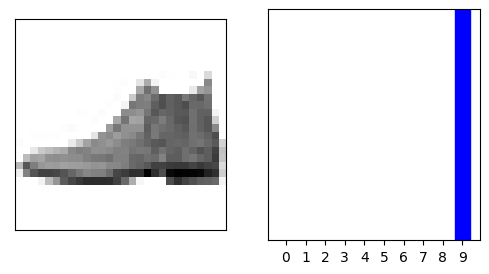

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

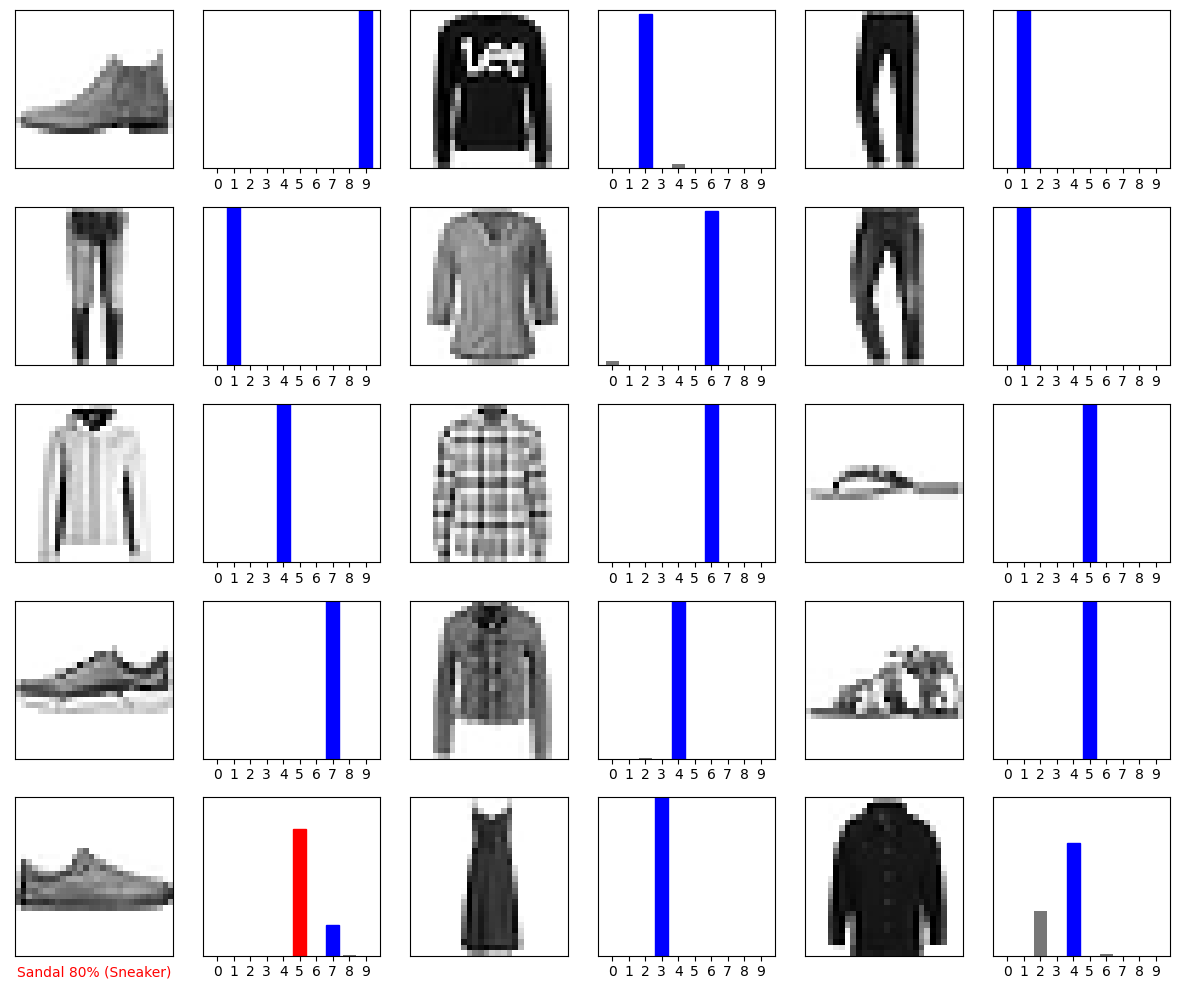

In [43]:
# Plot gambar uji X pertama, label prediksinya, dan label sebenarnya.
# Warna prediksi yang benar dengan warna biru dan prediksi yang salah dengan warna merah.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()